In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [5]:
dataset=pd.read_csv('../Data/train.csv')
dataset.head()

,Category,Message
0,ham,Heehee that was so funny tho
1,ham,I don wake since. I checked that stuff and saw...
2,ham,Dai what this da.. Can i send my resume to thi...
3,ham,U too...
4,ham,Didn't you get hep b immunisation in nigeria.


In [6]:
def clean_text(text):
    words_to_remove = set(stopwords.words('english'))
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in words_to_remove]
    text = ' '.join(text)
    
    return text

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    text = nltk.word_tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in text]
    text = ' '.join(text)
    return text

In [7]:
dataset['Message'] = dataset['Message'].apply(clean_text)
dataset['Message'] = dataset['Message'].apply(lemmatize_text)
dataset.head()

,Category,Message
0,ham,heehee funny tho
1,ham,wake since . checked stuff saw true available ...
2,ham,dai da .. send resume id .
3,ham,u ...
4,ham,n't get hep b immunisation nigeria .


# Q: is the length of the message show 

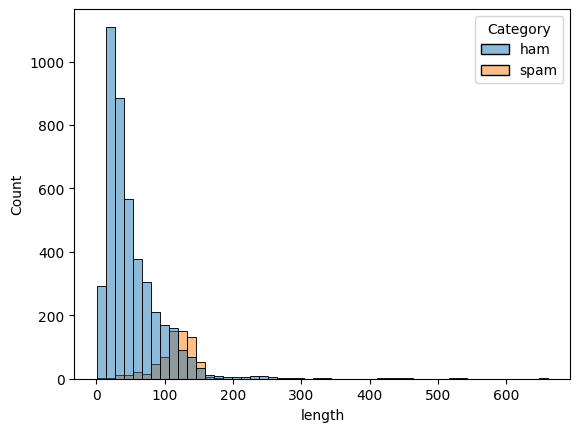

In [8]:
dataset['length']=dataset['Message'].apply(len)
sns.histplot(data=dataset,x='length',hue='Category',bins=50)
plt.show()

# T-Test Analysis: Message Length vs. Spam/Ham Classification

## Objective
We aim to determine whether there is a statistically significant relationship between the length of a message and its classification as spam or ham.

## Hypotheses
- **Null Hypothesis (H₀):** There is no relationship between message length and spam/ham classification.
- **Alternative Hypothesis (H₁):** There is a relationship between message length and spam/ham classification.

- **If p-value < 0.05:** Reject the null hypothesis. There is a statistically significant relationship between message length and spam/ham classification.
- **If p-value ≥ 0.05:** Fail to reject the null hypothesis. There is no statistically significant relationship between message length and spam/ham classification.

In [12]:
# null hypothesis:
from scipy.stats import ttest_ind

spam_lengths = dataset[dataset['Category'] == 'spam']['length']
ham_lengths = dataset[dataset['Category'] == 'ham']['length']

stat, p_value = ttest_ind(spam_lengths, ham_lengths, equal_var=False)  

print(f"T-test p-value: {p_value}")

T-test p-value: 1.0883235248299888e-304


## Conclusion:
since **p < 0.05:** We conclude that there is a relationship between message length and spam/ham classification.

# Q: is there is a relation between numbers and ham/spam classification

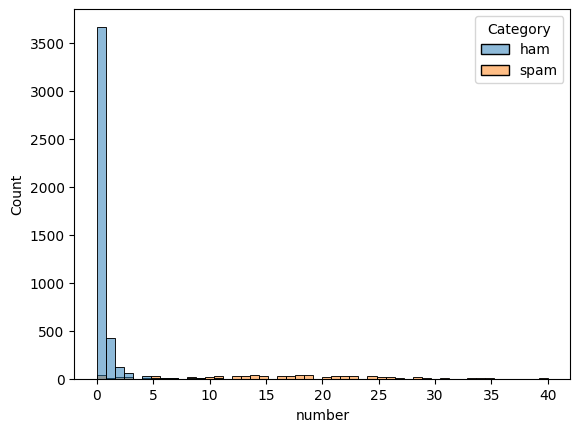

In [7]:
## plot the relation betweem existing number in the text and the spam/ham
dataset['number']=dataset['Message'].apply(lambda x: sum([1 for i in x if i.isnumeric()]))
sns.histplot(data=dataset,x='number',hue='Category',bins=50)
plt.show()

## conclusion:

as we can see most of ham messages have total of number less than 5 while almost all spams have total more than 5 

# Q: is there a relation between the symbols and the spam/ham

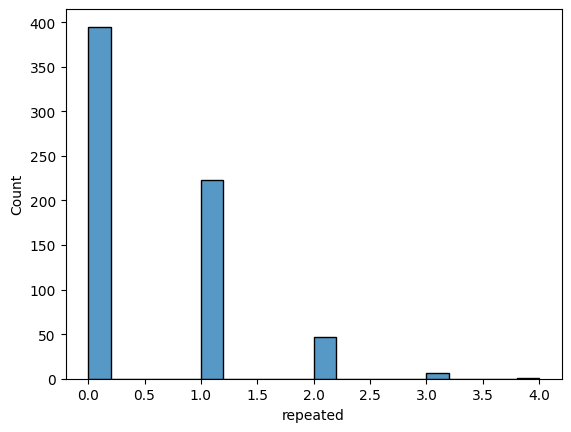

In [19]:
spam=dataset[dataset['Category']=='spam'].copy()
spam['repeated']=spam['Message'].apply(lambda x: len(re.findall(r'(\w)\1{2,}',x)))
sns.histplot(data=spam,x='repeated',bins=20)
plt.show()


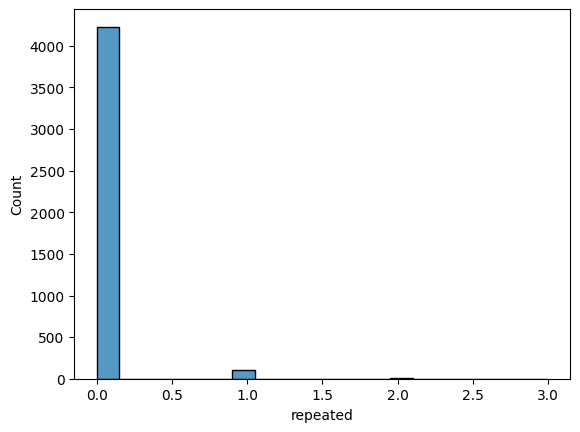

In [20]:
## check repeated symbols for hams in same message.
ham = dataset[dataset['Category'] == 'ham'].copy()
ham['repeated'] = ham['Message'].apply(lambda x: len(re.findall(r'(\w)\1{2,}', x)))
sns.histplot(data=ham,x='repeated',bins=20)
plt.show()

In [11]:
spam[spam['Message'].str.contains(r'[!?$@]', regex=True)].shape[0] / spam.shape[0]

0.6041666666666666

In [12]:
ham[ham['Message'].str.contains(r'[!?$@]', regex=True)].shape[0] / ham.shape[0]

0.3102257024412713

## conclusion:

looks like more than half of the spams have some symbols we can use this to keep most commun symbols 